<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/Energy_Consumption_Forecasting_and_Delhi_Temp_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/songulerdem/energy-consumption-forecasting-with-pycaret/notebook

In [1]:
pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 7.5 MB/s 
     |████████████████████████████████| 120 kB 47.2 MB/s 
     |████████████████████████████████| 9.8 MB 38.4 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 3.3 MB 34.0 MB/s 
     |████████████████████████████████| 79.9 MB 113 kB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 1.4 MB 39.5 MB/s 
     |████████████████████████████████| 303 kB 39.2 MB/s 
     |████████████████████████████████| 11.2 MB 37.8 MB/s 
     |████████████████████████████████| 2.0 MB 41.4 MB/s 
     |████████████████████████████████| 6.5 MB 35.5 MB/s 
     |████████████████████████████████| 930 kB 42.1 MB/s 
     |████████████████████████████████| 34.5 MB 16 kB/s 
  Created wheel for pyod: filename=p

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
data = pd.read_csv('/content/PDB_Load_History.csv')

In [5]:
data.head()

,date,year,month,day,weekday,hour,demand,temperature
0,3/1/2003,2003,3,1,7,1,12863.0,29
1,3/1/2003,2003,3,1,7,2,12389.0,28
2,3/1/2003,2003,3,1,7,3,12155.0,29
3,3/1/2003,2003,3,1,7,4,12072.0,27
4,3/1/2003,2003,3,1,7,5,12160.0,29


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103776 entries, 0 to 103775
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         103776 non-null  object 
 1   year         103776 non-null  int64  
 2   month        103776 non-null  int64  
 3   day          103776 non-null  int64  
 4   weekday      103776 non-null  int64  
 5   hour         103776 non-null  int64  
 6   demand       103776 non-null  float64
 7   temperature  103776 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.3+ MB


In [39]:
df = pd.DataFrame(data[['date','demand']])
df['date'] = pd.to_datetime(df['date'])
df = pd.DataFrame(df.resample('D', on='date', origin = 'start').sum())
df.reset_index(inplace=True)
df.head()

,date,demand
0,2003-03-01,341205.0
1,2003-03-02,332439.0
2,2003-03-03,392373.0
3,2003-03-04,397812.0
4,2003-03-05,369405.0


In [8]:
# create 14 days (two weeks) moving average.
df['MA14'] = df['demand'].rolling(14).mean()# plot the data and MA
import plotly.express as px
fig = px.line(df, x="date", y=["demand", "MA14"], template = 'plotly_dark')
fig.show()

In [9]:
temperature = data[['temperature', 'date']].copy()
temperature['date'] = pd.to_datetime(temperature['date'])
temperature = pd.DataFrame(temperature.resample('D', on='date', origin = 'start').mean())

In [10]:
temperature

,temperature
date,
2003-03-01,32.083333
2003-03-02,34.458333
2003-03-03,14.958333
2003-03-04,18.791667
2003-03-05,36.458333
...,...
2014-12-27,40.416667
2014-12-28,44.041667
2014-12-29,34.125000


In [11]:
df['month'] = [i.month for i in df['date']]
df['year'] = [i.year for i in df['date']]
df['day'] = [i.day for i in df['date']]
df['day_of_year'] = [i.dayofyear for i in df['date']]
df['temperature'] = temperature['temperature'].reset_index(drop=True)

In [12]:
df.head()

,date,demand,MA14,month,year,day,day_of_year,temperature
0,2003-03-01,341205.0,NaN,3,2003,1,60,32.083333
1,2003-03-02,332439.0,NaN,3,2003,2,61,34.458333
2,2003-03-03,392373.0,NaN,3,2003,3,62,14.958333
3,2003-03-04,397812.0,NaN,3,2003,4,63,18.791667
4,2003-03-05,369405.0,NaN,3,2003,5,64,36.458333


In [13]:
df['Series'] = np.arange(1, len(df)+1) #drop unnecessary columns and re-arrange
df.drop(['date', 'MA14'], axis=1, inplace=True)

In [14]:
df.columns

Index(['demand', 'month', 'year', 'day', 'day_of_year', 'temperature',
       'Series'],
      dtype='object')

In [15]:
df = df[['Series', 'demand', 'temperature', 'day', 'month', 'year', 'day_of_year']]

In [16]:
df.head()

,Series,demand,temperature,day,month,year,day_of_year
0,1,341205.0,32.083333,1,3,2003,60
1,2,332439.0,34.458333,2,3,2003,61
2,3,392373.0,14.958333,3,3,2003,62
3,4,397812.0,18.791667,4,3,2003,63
4,5,369405.0,36.458333,5,3,2003,64


In [17]:
print(df.isnull().sum())

Series         0
demand         0
temperature    0
day            0
month          0
year           0
day_of_year    0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Series       4324 non-null   int64  
 1   demand       4324 non-null   float64
 2   temperature  4324 non-null   float64
 3   day          4324 non-null   int64  
 4   month        4324 non-null   int64  
 5   year         4324 non-null   int64  
 6   day_of_year  4324 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 236.6 KB


In [19]:
from pycaret.time_series import *

In [20]:
set_temperature = setup(data=temperature, fh=31, fold=3, session_id=123)

,Description,Value
0,session_id,123
1,Target,temperature
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(4324, 1)"
5,Train data shape,"(4293, 1)"
6,Test data shape,"(31, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [21]:
best_ = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,7.9164,9.4314,0.1751,0.1555,1.0406,0.9664,-0.6861,0.7433
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,8.0037,9.2958,0.1831,0.1575,1.0522,0.9526,-0.738,0.7567
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,8.0253,9.326,0.1833,0.1577,1.055,0.9557,-0.7512,0.7400
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,8.0252,9.326,0.1833,0.1577,1.055,0.9557,-0.7512,0.7267
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,8.0271,9.3277,0.1834,0.1577,1.0552,0.9559,-0.7519,0.7400
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,8.0252,9.326,0.1833,0.1577,1.055,0.9557,-0.7512,0.7333
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,8.0298,9.3258,0.1837,0.1579,1.0556,0.9557,-0.7507,0.7367
naive,Naive Forecaster,8.7151,10.1129,0.1906,0.1666,1.1456,1.0363,-1.2516,1.4400
theta,Theta Forecaster,8.7172,10.1155,0.1907,0.1667,1.1459,1.0365,-1.2529,0.0867
ets,ETS,8.7782,10.197,0.1918,0.1674,1.1539,1.0449,-1.2998,1.2533


In [22]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,4324.0
1,Summary,Statistics,Actual,Mean,,50.576097
2,Summary,Statistics,Actual,Median,,51.6875
3,Summary,Statistics,Actual,Standard Deviation,,17.50099
4,Summary,Statistics,Actual,Variance,,306.284646
5,Summary,Statistics,Actual,Kurtosis,,-0.906248
6,Summary,Statistics,Actual,Skewness,,-0.235117
7,Summary,Statistics,Actual,# Distinct Values,,1506.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",71250.673763
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",118328.595106


In [23]:
#Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending
omp_cds_dt = create_model('omp_cds_dt')
print(omp_cds_dt)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2014-08-29,7.1514,8.8560,0.1042,0.1124,0.9395,0.9067,-0.4576
1,2014-09-29,6.0822,6.6574,0.1119,0.1072,0.7993,0.6821,-0.2555
2,2014-10-30,10.5156,12.7807,0.3092,0.2469,1.3831,1.3105,-1.3452
Mean,NaT,7.9164,9.4314,0.1751,0.1555,1.0406,0.9664,-0.6861
SD,NaT,1.8890,2.5327,0.0949,0.0646,0.2488,0.2600,0.4733


BaseCdsDtForecaster(regressor=OrthogonalMatchingPursuit(), sp=7,
                    window_length=7)


In [24]:
tuned_omp_cds_dt = tune_model(omp_cds_dt)
print(tuned_omp_cds_dt)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2014-08-29,10.2206,11.9906,0.1527,0.1703,1.3427,1.2277,-1.6720
1,2014-09-29,5.7609,6.6823,0.1030,0.1017,0.7571,0.6846,-0.2649
2,2014-10-30,6.2787,7.7092,0.1604,0.1570,0.8258,0.7905,0.1467
Mean,NaT,7.4201,8.7940,0.1387,0.1430,0.9752,0.9009,-0.5967
SD,NaT,1.9915,2.2988,0.0255,0.0297,0.2614,0.2351,0.7787


BaseCdsDtForecaster(degree=9,
                    regressor=OrthogonalMatchingPursuit(fit_intercept=False,
                                                        n_nonzero_coefs=1,
                                                        normalize=True),
                    sp=14, window_length=8)


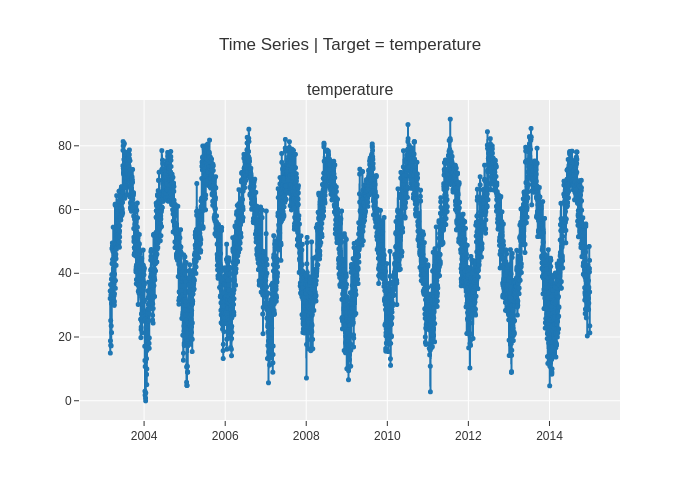

In [25]:
plot_model(plot='ts')

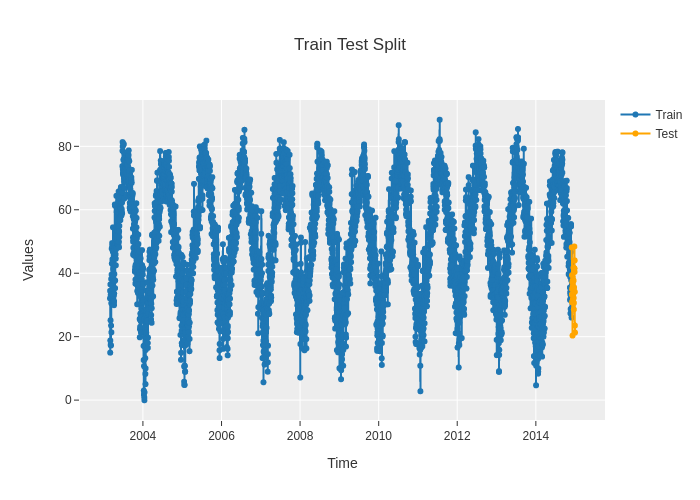

In [26]:
plot_model(plot='train_test_split')

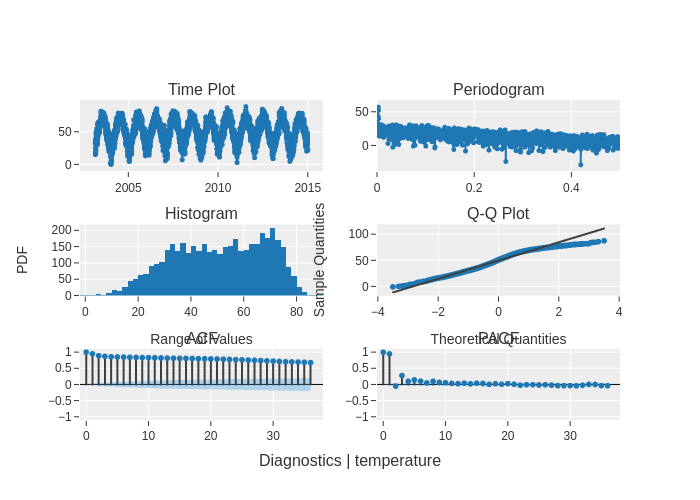

In [27]:
# Diagnostics plot
plot_model(plot='diagnostics')

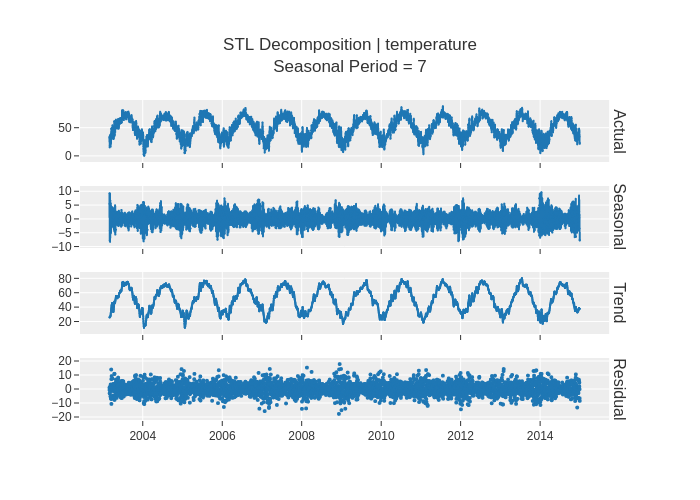

In [28]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

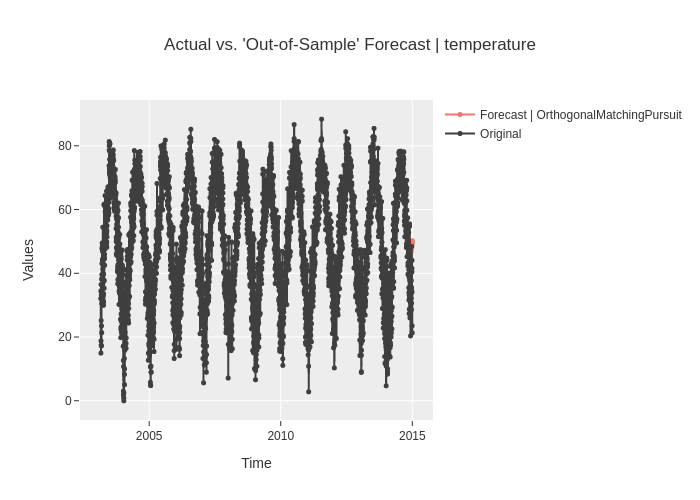

In [29]:
plot_model(best_,plot='forecast')

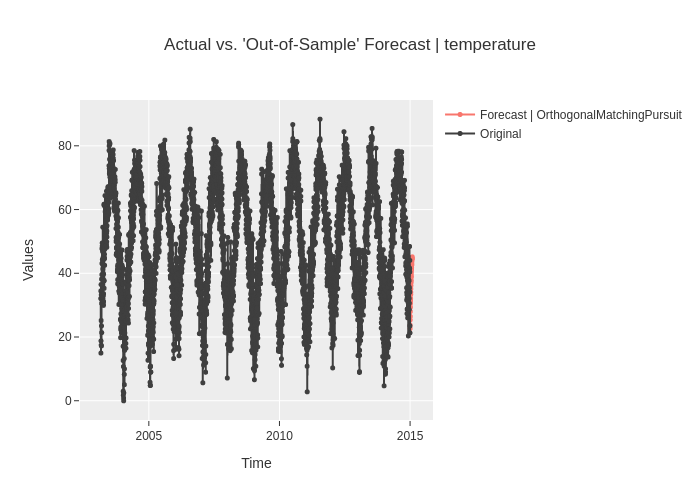

In [33]:
plot_model(finalize_model(best_),plot='forecast', data_kwargs={'fh' :31})

In [37]:
# temperature prediction of the next days
last_best = finalize_model(tuned_omp_cds_dt)
forecast_temperature = pd.DataFrame(predict_model(last_best, fh=31))
forecast_temperature

,y_pred
2015-01-01,20.5441
2015-01-02,19.9583
2015-01-03,19.6751
2015-01-04,18.9995
2015-01-05,18.5786
2015-01-06,18.2955
2015-01-07,17.9036
2015-01-08,17.4721
2015-01-09,16.4640
2015-01-10,16.3650


DelhiClimate

In [40]:
data = pd.read_csv('/content/DailyDelhiClimateTrain (1).csv')

In [41]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [43]:
df = pd.DataFrame(data[['date','meantemp']])
df['date'] = pd.to_datetime(df['date'])
df = pd.DataFrame(df.resample('D', on='date', origin = 'start').sum())
df.reset_index(inplace=True)
df.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [44]:
# create 14 days (two weeks) moving average.
df['MA14'] = df['meantemp'].rolling(14).mean()# plot the data and MA
import plotly.express as px
fig = px.line(df, x="date", y=["meantemp", "MA14"], template = 'plotly_dark')
fig.show()

In [46]:
temperature = data[['meantemp', 'date']].copy()
temperature['date'] = pd.to_datetime(temperature['date'])
temperature = pd.DataFrame(temperature.resample('D', on='date', origin = 'start').mean())

In [47]:
df['month'] = [i.month for i in df['date']]
df['year'] = [i.year for i in df['date']]
df['day'] = [i.day for i in df['date']]
df['day_of_year'] = [i.dayofyear for i in df['date']]
df['meantemp'] = temperature['meantemp'].reset_index(drop=True)

In [48]:
df.head()

,date,meantemp,MA14,month,year,day,day_of_year
0,2013-01-01,10.000000,NaN,1,2013,1,1
1,2013-01-02,7.400000,NaN,1,2013,2,2
2,2013-01-03,7.166667,NaN,1,2013,3,3
3,2013-01-04,8.666667,NaN,1,2013,4,4
4,2013-01-05,6.000000,NaN,1,2013,5,5


In [49]:
df['Series'] = np.arange(1, len(df)+1) #drop unnecessary columns and re-arrange
df.drop(['date', 'MA14'], axis=1, inplace=True)

In [50]:
df.columns

Index(['meantemp', 'month', 'year', 'day', 'day_of_year', 'Series'], dtype='object')

In [52]:
df = df[['Series', 'meantemp', 'day', 'month', 'year', 'day_of_year']]

In [53]:
df.head()

,Series,meantemp,day,month,year,day_of_year
0,1,10.000000,1,1,2013,1
1,2,7.400000,2,1,2013,2
2,3,7.166667,3,1,2013,3
3,4,8.666667,4,1,2013,4
4,5,6.000000,5,1,2013,5


In [54]:
print(df.isnull().sum())

Series         0
meantemp       0
day            0
month          0
year           0
day_of_year    0
dtype: int64


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Series       1462 non-null   int64  
 1   meantemp     1462 non-null   float64
 2   day          1462 non-null   int64  
 3   month        1462 non-null   int64  
 4   year         1462 non-null   int64  
 5   day_of_year  1462 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 68.7 KB


In [56]:
from pycaret.time_series import *

In [57]:
set_temperature = setup(data=temperature, fh=31, fold=3, session_id=123)

,Description,Value
0,session_id,123
1,Target,meantemp
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1462, 1)"
5,Train data shape,"(1431, 1)"
6,Test data shape,"(31, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [58]:
best_ = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,1.8347,2.2492,0.0696,0.0654,0.7699,0.7412,-0.9189,0.5233
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,1.9771,2.3872,0.0738,0.0697,0.8289,0.7861,-1.1844,0.4967
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.9677,2.3512,0.075,0.0718,0.8251,0.7747,-1.2569,0.4433
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,2.1869,2.5736,0.0806,0.0765,0.9164,0.8472,-1.5588,2.6833
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,2.3229,2.7203,0.0856,0.0805,0.9737,0.8957,-1.8232,3.3333
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,2.2515,2.6986,0.0857,0.0806,0.9446,0.8893,-2.0549,0.2767
naive,Naive Forecaster,2.2573,2.6234,0.0849,0.0806,0.9465,0.8642,-1.6442,1.2100
theta,Theta Forecaster,2.3012,2.6647,0.0871,0.0825,0.9651,0.878,-1.7523,0.1933
exp_smooth,Exponential Smoothing,2.3402,2.7228,0.0893,0.0839,0.982,0.8974,-1.8652,1.5433
ets,ETS,2.3397,2.7222,0.0893,0.0839,0.9818,0.8972,-1.8638,0.4433


In [59]:
#Gradient Boosting w/ Cond. Deseasonalize & Det...
gbr_cds_dt = create_model('gbr_cds_dt')
print(gbr_cds_dt)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2016-08-30,0.8302,1.1779,0.0272,0.0268,0.3449,0.3850,0.1312
1,2016-09-30,3.3761,3.8600,0.1220,0.1126,1.4169,1.2717,-2.3618
2,2016-10-31,1.2977,1.7098,0.0597,0.0568,0.5478,0.5668,-0.5261
Mean,NaT,1.8347,2.2492,0.0696,0.0654,0.7699,0.7412,-0.9189
SD,NaT,1.1065,1.1595,0.0393,0.0356,0.4649,0.3824,1.0550


BaseCdsDtForecaster(regressor=GradientBoostingRegressor(random_state=123), sp=7,
                    window_length=7)


In [70]:
tuned_gbr_cds_dt = tune_model(gbr_cds_dt)
print(tuned_gbr_cds_dt)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2016-08-30,3.5900,3.7651,0.1133,0.1207,1.4915,1.2306,-7.8774
1,2016-09-30,1.5762,2.0214,0.0545,0.0547,0.6615,0.6659,0.0781
2,2016-10-31,5.5704,5.7847,0.2489,0.2188,2.3516,1.9178,-16.4696
Mean,NaT,3.5788,3.8571,0.1389,0.1314,1.5015,1.2714,-8.0896
SD,NaT,1.6307,1.5378,0.0814,0.0674,0.6900,0.5119,6.7572


BaseCdsDtForecaster(regressor=GradientBoostingRegressor(random_state=123), sp=7,
                    window_length=7)


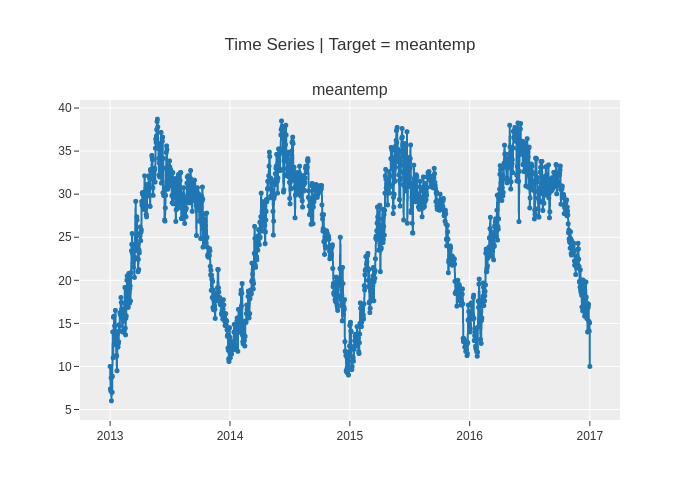

In [60]:
plot_model(plot='ts')

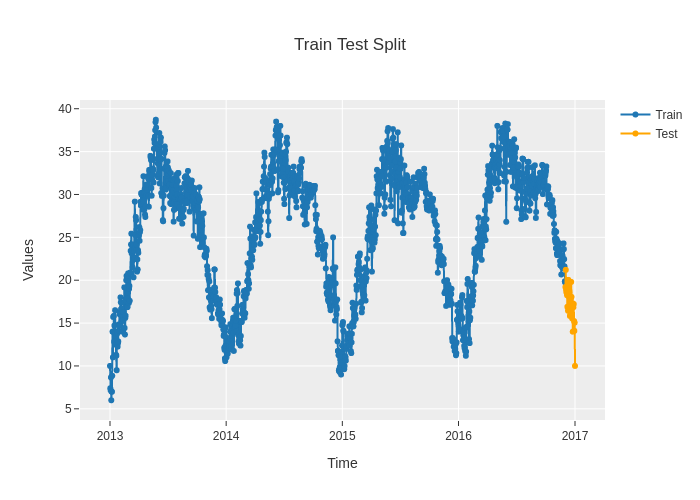

In [61]:
plot_model(plot='train_test_split')

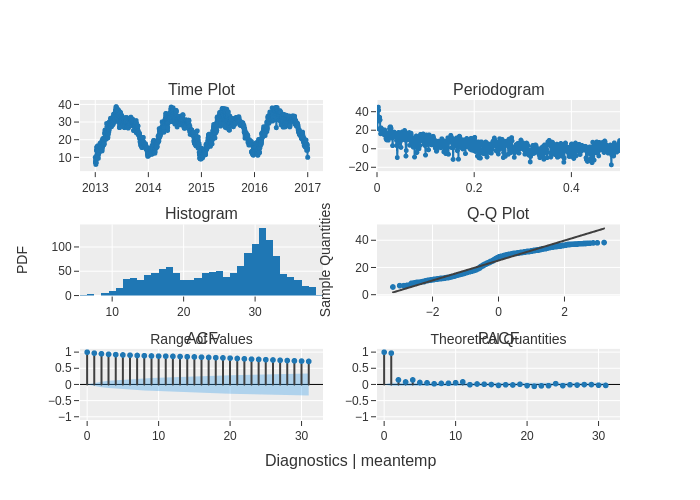

In [62]:
# Diagnostics plot
plot_model(plot='diagnostics')

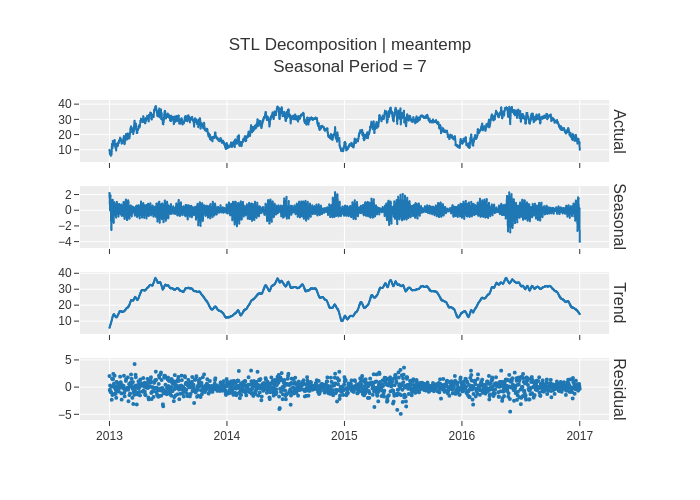

In [63]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

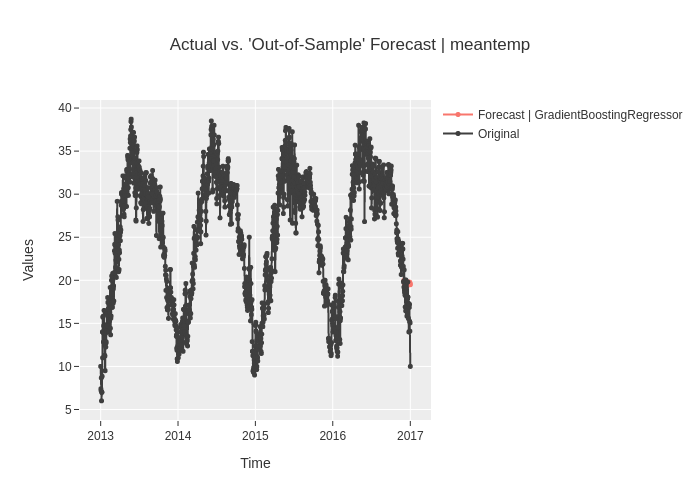

In [64]:
plot_model(best_,plot='forecast')

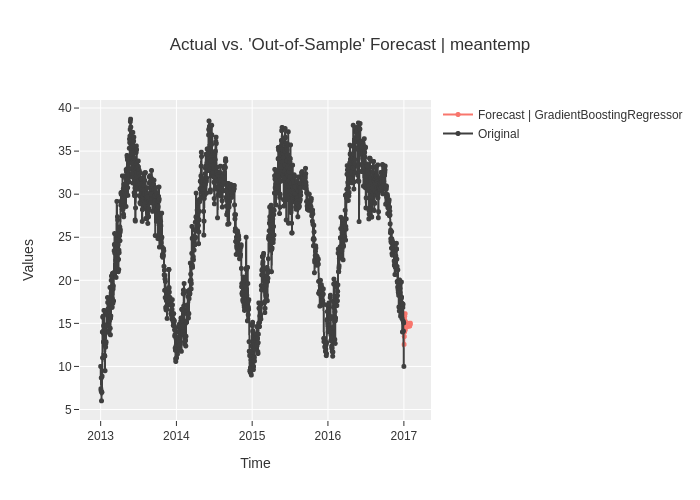

In [66]:
plot_model(finalize_model(best_),plot='forecast', data_kwargs={'fh' :31})

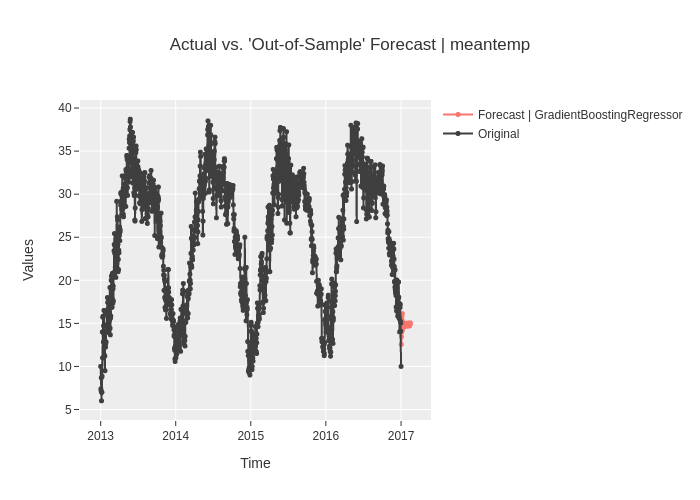

In [68]:
plot_model(finalize_model(best_),plot='forecast', data_kwargs={'fh' :31})

In [71]:
# temperature prediction of the next days
last_best = finalize_model(tuned_gbr_cds_dt)
forecast_temperature = pd.DataFrame(predict_model(last_best, fh=31))
forecast_temperature

,y_pred
2017-01-02,12.5541
2017-01-03,13.4672
2017-01-04,13.9829
2017-01-05,15.8072
2017-01-06,15.3498
2017-01-07,16.1251
2017-01-08,14.2414
2017-01-09,15.1561
2017-01-10,14.6734
2017-01-11,14.8617
